<a href="https://colab.research.google.com/github/vicuchi/infovis/blob/main/tp_final_precios_surtidor/tp_precios_surtidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contexto:
En el marco de una recomposicion del precio para alcanzar el Export Parity, se ajustan trimestralmente los precios de las naftas a causa de la devaluacion mensual del 2% (crawling peg) sumado a los ajustes en el impuesto a los Combustibles Liquidos y al Dioxido de Carbono (ICL - IDC). A partir de mayo de 2024 se empezaron a postergar los aumentos del ICL debido a su impacto en la inflación. En septiembre de 2024 el atraso de los combustibles es del 88%. Lo que significaría un impuesto de ARS 314 por litro (+ ARS 146).

Se analiza la base de datos de Precios en el Surtidor de la Secretaría de Energía.

La base cuenta con los datos del Sistema en línea de información de precios de combustibles en surtidor, a través del cual los titulares de bocas de expendio de combustibles líquidos inscriptos en el registro creado por la resolución n° 1.102/2004 presentan la información relativa a precios de comercialización minorista dentro de las 8 (ocho) horas de producida una modificación en el precio en surtidor.
https://datos.gob.ar/sv/dataset/energia-precios-surtidor---resolucion-3142016


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Obtenemos los datos directo desde la pagina web de Energía

In [3]:
!wget http://datos.energia.gob.ar/dataset/1c181390-5045-475e-94dc-410429be4b17/resource/80ac25de-a44a-4445-9215-090cf55cfda5/download/precios-en-surtidor-resolucin-3142016.csv

--2024-09-08 15:06:48--  http://datos.energia.gob.ar/dataset/1c181390-5045-475e-94dc-410429be4b17/resource/80ac25de-a44a-4445-9215-090cf55cfda5/download/precios-en-surtidor-resolucin-3142016.csv
Resolving datos.energia.gob.ar (datos.energia.gob.ar)... 168.101.26.134
Connecting to datos.energia.gob.ar (datos.energia.gob.ar)|168.101.26.134|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9290536 (8.9M) [text/csv]
Saving to: ‘precios-en-surtidor-resolucin-3142016.csv’

precios-en-surtidor 100%[===================>]   8.86M   584KB/s    in 14s     

2024-09-08 15:07:03 (672 KB/s) - ‘precios-en-surtidor-resolucin-3142016.csv’ saved [9290536/9290536]



In [8]:
base = pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")

Obervamos que columnas tiene la base de datos y de que tipo son los datos

In [9]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36764 entries, 0 to 36763
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   indice_tiempo     36764 non-null  object 
 1   idempresa         36764 non-null  int64  
 2   cuit              36764 non-null  object 
 3   empresa           36764 non-null  object 
 4   direccion         36764 non-null  object 
 5   localidad         36764 non-null  object 
 6   provincia         36764 non-null  object 
 7   region            29419 non-null  object 
 8   idproducto        36764 non-null  int64  
 9   producto          36764 non-null  object 
 10  idtipohorario     36764 non-null  int64  
 11  tipohorario       36764 non-null  object 
 12  precio            36764 non-null  float64
 13  fecha_vigencia    36764 non-null  object 
 14  idempresabandera  36764 non-null  int64  
 15  empresabandera    36764 non-null  object 
 16  latitud           36666 non-null  float6

vemos que tipos de productos refiere la base

In [ ]:
base.producto.unique()

array(['Gas Oil Grado 2', 'Gas Oil Grado 3', 'GNC',
       'Nafta (premium) de más de 95 Ron',
       'Nafta (súper) entre 92 y 95 Ron'], dtype=object)

Filtramos la base para quedarnos con los precios informados en agosto, solo para la nafta y el horario diruno; asi evitar duplicaciones y diferenciales de precio entre productos.

In [10]:
base=base[(base["indice_tiempo"] == "2024-08") & (base["producto"] == "Nafta (súper) entre 92 y 95 Ron")&(base["tipohorario"] == "Diurno")]

Hacemos un describe de la base para tener estadisticas basicas de la base

In [ ]:
base.describe()

,idempresa,idproducto,idtipohorario,precio,idempresabandera,latitud,longitud
count,383.000000,383.0,383.0,383.000000,383.000000,381.000000,381.000000
mean,6510.563969,2.0,2.0,1089.258486,14.417755,-33.066979,-61.739116
std,3133.039136,0.0,0.0,79.784878,12.103952,3.913938,3.422119
min,120.000000,2.0,2.0,803.000000,1.000000,-46.798999,-71.535157
25%,3531.000000,2.0,2.0,1078.000000,4.000000,-34.817422,-64.248750
50%,7046.000000,2.0,2.0,1104.000000,6.000000,-33.542930,-61.044260
75%,9381.000000,2.0,2.0,1129.000000,28.000000,-31.330719,-58.599058
max,11070.000000,2.0,2.0,1328.000000,30.000000,-22.240150,-54.617900


Podemos ver en donde esta el precio mas bajo

In [ ]:
base[base["precio"] == 803]

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
13880,2024-08,2525,30-70725838-8,ESTACION SERVICIO DEL CENTRO SRL,RIVADAVIA E YRIGOYEN,PICO TRUNCADO,SANTA CRUZ,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,803,2024-08-01 10:30:00,26,AXION,-46.798999,-67.960328,"{""type"":""Point"",""coordinates"":[-67.960328,-46...."


Podemos observar donde, por el contrario, esta el precio más alto

In [ ]:
base[base["precio"] == 1328]

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
15930,2024-08,6018,30-70771499-5,GNC ALBERDI SA,AV. CÁRCAMO 737,VILLA CARLOS PAZ,CORDOBA,CENTRO,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,1328,2024-08-07 11:19:00,1,BLANCA,-31.43515,-64.49996,"{""type"":""Point"",""coordinates"":[-64.49996,-31.4..."


In [ ]:
base.head(5)

,indice_tiempo,idempresa,cuit,empresa,direccion,localidad,provincia,region,idproducto,producto,idtipohorario,tipohorario,precio,fecha_vigencia,idempresabandera,empresabandera,latitud,longitud,geojson
8,2024-08,1376,33-64337382-9,10 DE SETIEMBRE S.A.,Av. Mosconi 299,LOMAS DEL MIRADOR,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,1078,2024-08-01 13:39:00,28,PUMA,-34.658476,-58.529443,"{""type"":""Point"",""coordinates"":[-58.529443,-34...."
16,2024-08,10677,30-71752323-3,1263 S.R.L.,UTA NAC. 3 KM. 1258 (COLECTORA CALLE 102 Nº 32...,SIERRA GRANDE,RIO NEGRO,NaN,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,829,2024-08-01 16:56:00,28,PUMA,-41.607070,-65.353830,"{""type"":""Point"",""coordinates"":[-65.35383,-41.6..."
24,2024-08,8943,30-71251168-7,1913 SRL,Julio A Roca 715,GOBERNADOR COSTA,CHUBUT,PATAGONIA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,829,2024-08-01 16:34:00,28,PUMA,-44.050662,-70.583041,"{""type"":""Point"",""coordinates"":[-70.583041,-44...."
34,2024-08,11024,30-71810664-4,197 COMBUSTIBLES SRL,Hipolito Iriyoyen 2688,EL TALAR,BUENOS AIRES,NaN,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,1045,2024-08-31 11:30:00,28,PUMA,-34.475970,-58.663180,"{""type"":""Point"",""coordinates"":[-58.66318,-34.4..."
86,2024-08,7544,30-70944428-6,44 LA PLATA SRL,44 y 142 2281,LA PLATA,BUENOS AIRES,PAMPEANA,2,Nafta (súper) entre 92 y 95 Ron,2,Diurno,1088,2024-08-08 17:18:00,4,SHELL C.A.P.S.A.,-34.943490,-57.991692,"{""type"":""Point"",""coordinates"":[-57.991692,-34...."


In [ ]:
base.empresabandera.unique()

array(['PUMA', 'SHELL C.A.P.S.A.', 'AXION', 'BLANCA', 'DAPSA S.A.',
       'GULF', 'REFINOR', 'YPF', 'VOY'], dtype=object)

In [ ]:
base.empresabandera.unique().size

9

Boxpot del precio por empresa bandera. Hay varios outsiders. Pero en general el precio mas bajo es de YPF; aunque tambien presenta la mayor dispersion.

<Axes: title={'center': 'box plots'}, xlabel='empresabandera', ylabel='precio'>

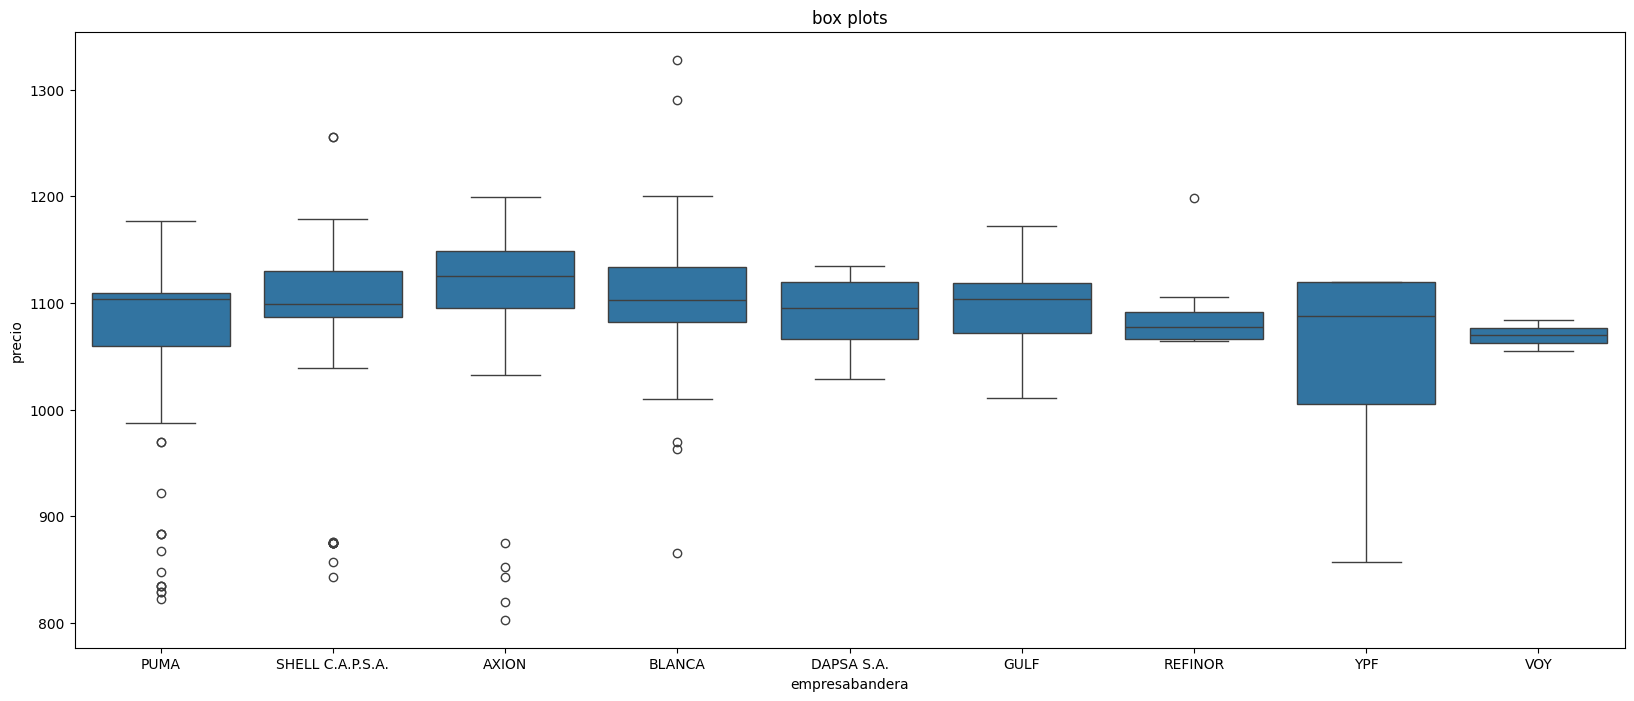

In [ ]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(20,8))

plt.title('box plots')
sns.boxplot(x=base.empresabandera, y=base.precio)


Si observamos los boxplot por provincia: Se observa nitidamente una diferencia muy marcada entre las provincias de la Patagonia vs el resto del país.

<Axes: title={'center': 'box plots'}, xlabel='provincia', ylabel='precio'>

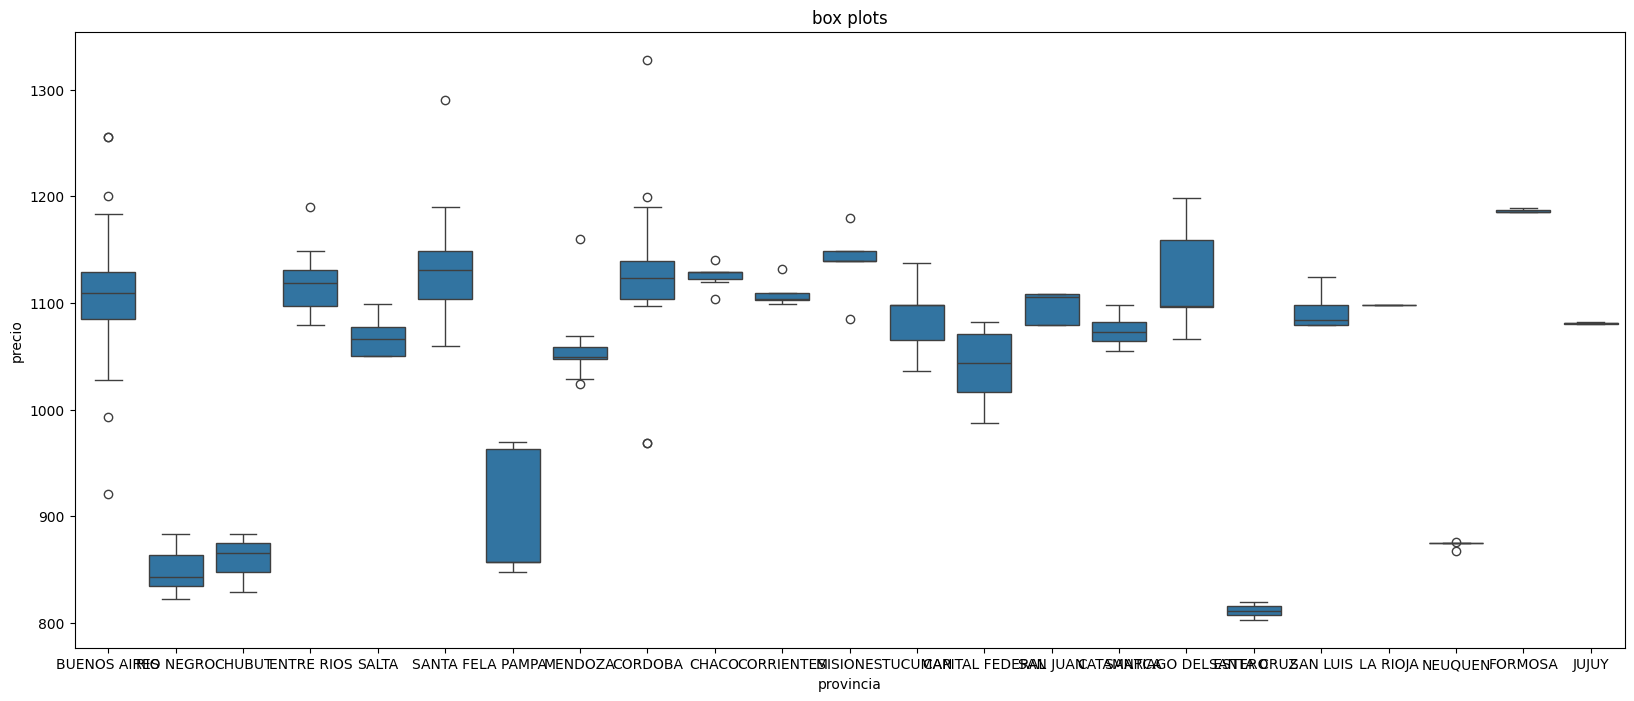

In [ ]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(20,8))

plt.title('box plots')
sns.boxplot(x=base.provincia, y=base.precio)


Histograma de precios. La mediana es 1104 y la media 1089; lo que sugiere una cola a la izquierda más pesada.

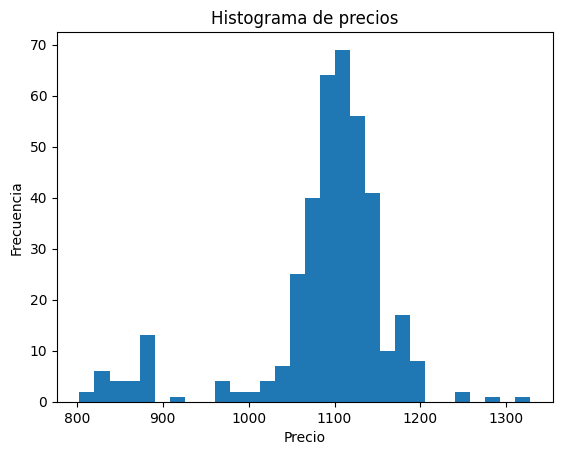

In [ ]:
plt.hist(base.precio, bins=30)
plt.title("Histograma de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


In [ ]:
base.provincia.unique()

array(['BUENOS AIRES', 'RIO NEGRO', 'CHUBUT', 'ENTRE RIOS', 'SALTA',
       'SANTA FE', 'LA PAMPA', 'MENDOZA', 'CORDOBA', 'CHACO',
       'CORRIENTES', 'MISIONES', 'TUCUMAN', 'CAPITAL FEDERAL', 'SAN JUAN',
       'CATAMARCA', 'SANTIAGO DEL ESTERO', 'SANTA CRUZ', 'SAN LUIS',
       'LA RIOJA', 'NEUQUEN', 'FORMOSA', 'JUJUY'], dtype=object)

Queremos saber la cantidad de empresas diferentes que hay por provincia

In [ ]:
empresas_prov= base.groupby('provincia')['empresabandera'].nunique()
empresas_prov = empresas_prov.sort_values(ascending=False)
empresas_prov


,empresabandera
provincia,
BUENOS AIRES,7
SANTA FE,7
ENTRE RIOS,6
CORDOBA,5
CAPITAL FEDERAL,5
TUCUMAN,5
SANTIAGO DEL ESTERO,4
CATAMARCA,4
LA PAMPA,4


Agrupamos por empresa y bandera para saber el precio medio

In [ ]:

precio_medio = base.groupby(['provincia', 'empresabandera'])['precio'].mean()
precio_medio = precio_medio.sort_values(ascending=False)
precio_medio


provincia            empresabandera
SANTIAGO DEL ESTERO  REFINOR           1198.0
FORMOSA              AXION             1187.0
                     BLANCA            1185.0
MISIONES             AXION             1180.0
SANTIAGO DEL ESTERO  BLANCA            1179.0
                                        ...  
CHUBUT               PUMA               856.0
LA PAMPA             PUMA               848.0
RIO NEGRO            AXION              847.5
                     PUMA               846.0
SANTA CRUZ           AXION              811.5
Name: precio, Length: 84, dtype: float64

Obtenemos el precio medio por provincia

In [ ]:
precio_medio= base.groupby('provincia')['precio'].mean()
precio_medio.sort_values(ascending=False)

,precio
provincia,
FORMOSA,1186.333333
MISIONES,1138.400000
SANTA FE,1132.023810
CHACO,1125.700000
SANTIAGO DEL ESTERO,1122.166667
CORDOBA,1121.976190
ENTRE RIOS,1117.260870
BUENOS AIRES,1109.137931
CORRIENTES,1107.500000


Graficamos el precio medio por provincia

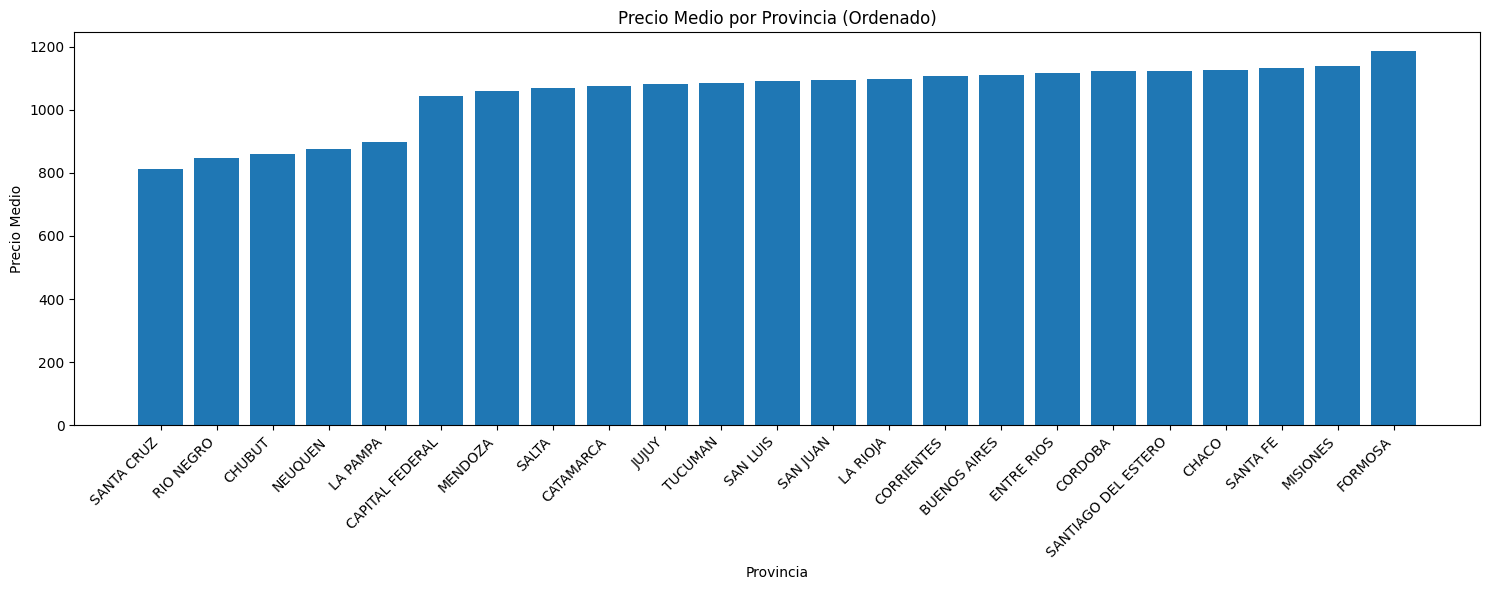

In [ ]:
precio_medio = base.groupby('provincia')['precio'].mean()
precio_medio = precio_medio.sort_values()
plt.figure(figsize=(15, 6))
plt.bar(precio_medio.index, precio_medio.values)
plt.xlabel('Provincia')
plt.ylabel('Precio Medio')
plt.title('Precio Medio por Provincia (Ordenado)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En el grafico anterior se puede observar que las provincias de la Patagonia tienen precios mas bajos en comparacion a la media del país debido a que no estan alcanzados por el impuesto a los combustibles

Un analisis interesante para hacerse es:
Ver el precio en agosto 24 vs el precio en septiembre 24 y tratar de verficar que los precios de CABA aumentaron el doble respecto a los de AMBA dado que historicamente eran mas baratos y se estaba generando una migracion para cargar en las estaciones de caba:
https://econojournal.com.ar/2024/09/achicar-brecha-precios-gba-conurbano-naftas-combustibles-caba/


In [4]:
base_sep = pd.read_csv("precios-en-surtidor-resolucin-3142016.csv")

In [7]:
base_sep = base_sep[(base_sep["indice_tiempo"] == "2024-09") & (base_sep["producto"] == "Nafta (súper) entre 92 y 95 Ron") & (base_sep["tipohorario"] == "Diurno") & ((base_sep["provincia"] =="CAPITAL FEDERAL") | (base_sep["provincia"] == "BUENOS AIRES"))]


In [12]:
base=base[ ((base["provincia"] =="CAPITAL FEDERAL") | (base["provincia"] == "BUENOS AIRES"))]

In [38]:
precio_medio_ago = base.groupby('provincia')['precio'].mean()
precio_medio_sep = base_sep.groupby('provincia')['precio'].mean()
variaciones = (precio_medio_sep - precio_medio_ago) / precio_medio_ago * 100

print("Precio medio en agosto:\n", precio_medio_ago)
print("\nPrecio medio en septiembre:\n", precio_medio_sep)
print("\nVariaciones entre septiembre y agosto:\n", variaciones)


Precio medio en agosto:
 provincia
BUENOS AIRES       1111.830928
CAPITAL FEDERAL    1028.800000
Name: precio, dtype: float64

Precio medio en septiembre:
 provincia
BUENOS AIRES       1143.941824
CAPITAL FEDERAL    1093.508876
Name: precio, dtype: float64

Variaciones entre septiembre y agosto:
 provincia
BUENOS AIRES       2.888110
CAPITAL FEDERAL    6.289743
Name: precio, dtype: float64


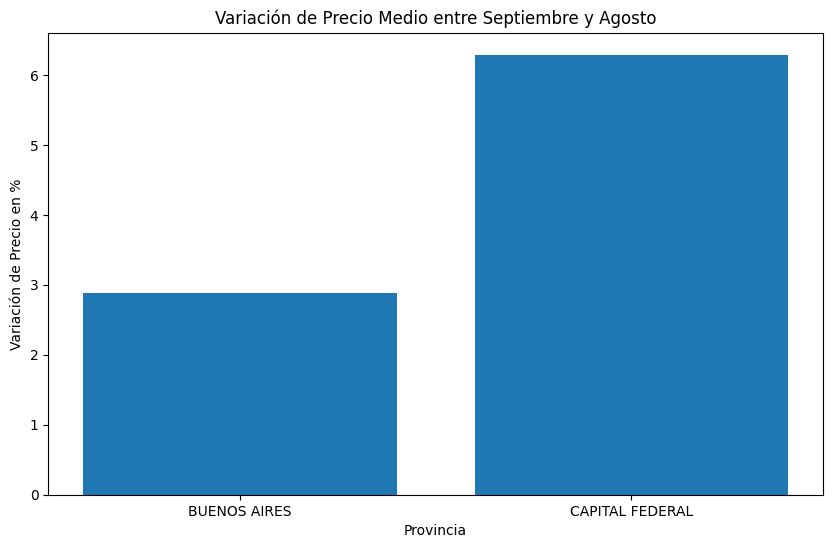

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(variaciones.index, variaciones.values)
plt.xlabel('Provincia')
plt.ylabel('Variación de Precio en %')
plt.title('Variación de Precio Medio entre Septiembre y Agosto')
plt.show()


In [30]:
ratio_ago = precio_medio_ago["CAPITAL FEDERAL"] / precio_medio_ago["BUENOS AIRES"]
ratio_sep = precio_medio_sep["CAPITAL FEDERAL"] / precio_medio_sep["BUENOS AIRES"]

print(f"Ratio Capital Federal / Buenos Aires en agosto: {ratio_ago:.2f}")
print(f"Ratio Capital Federal / Buenos Aires en septiembre: {ratio_sep:.2f}")


Ratio Capital Federal / Buenos Aires en agosto: 0.93
Ratio Capital Federal / Buenos Aires en septiembre: 0.96


Verificamos que en CABA los precios de la nafta super son mas baratos que en BS AS en promedio; Sin embargo, el utimo aumento en BS AS fue del 3%, mientras que en CABA fue mayor, +6%, lo que disminuyo la brecha en 3 puntos porcentuales.  